# Project Topic - Heart Failure Prediction 

## Introduction 
An effective heart disease prediction system (EHDPS) is developed using neural network for predicting the risk level 
of heart disease. 
The system uses 13 medical parameters such as age, sex, blood pressure, cholesterol, and obesity for prediction.
The heart failure prediction can be implemented using many algorithms such as SVM, Naïve Bayes, Logistic Regression,
Decision Tree, KNN and Artificial neural network.

## About the Dataset
age: Age of the patient

anaemia: If the patient had the haemoglobin below the normal range

creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L

diabetes: If the patient was diabetic

ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction

high_blood_pressure: If the patient had hypertension

platelets: Platelet count of blood in kiloplatelets/mL

serum_creatinine: The level of serum creatinine in the blood in mg/dL

serum_sodium: The level of serum sodium in the blood in mEq/L

sex: The sex of the patient

smoking: If the patient smokes actively or ever did in past

time: It is the time of the patient's follow-up visit for the disease in months

DEATH_EVENT: If the patient deceased during the follow-up period

### Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

### Import The Dataset

In [2]:
data = pd.read_csv('D:/downloads/heart_failure_clinical_records_dataset.csv')

In [3]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Data Cleaning

In [4]:
data.shape

(299, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

NO Null Values are present in the dataset

In [8]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [9]:
# Change the datatype of age from float to in
data['age'] = data['age'].astype(int)

In [10]:
data.dtypes

age                           int32
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [11]:
# Define Y variable (Output)
Y = data['DEATH_EVENT']

### One Hot Encoding (Converting Categorical variables into dummy variables )

In [12]:
data = pd.get_dummies(data, columns = ['anaemia', 'smoking', 'high_blood_pressure', 'diabetes', 'sex'])

In [13]:
data

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT,anaemia_0,anaemia_1,smoking_0,smoking_1,high_blood_pressure_0,high_blood_pressure_1,diabetes_0,diabetes_1,sex_0,sex_1
0,75,582,20,265000.00,1.9,130,4,1,1,0,1,0,0,1,1,0,0,1
1,55,7861,38,263358.03,1.1,136,6,1,1,0,1,0,1,0,1,0,0,1
2,65,146,20,162000.00,1.3,129,7,1,1,0,0,1,1,0,1,0,0,1
3,50,111,20,210000.00,1.9,137,7,1,0,1,1,0,1,0,1,0,0,1
4,65,160,20,327000.00,2.7,116,8,1,0,1,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,61,38,155000.00,1.1,143,270,0,1,0,0,1,0,1,0,1,0,1
295,55,1820,38,270000.00,1.2,139,271,0,1,0,1,0,1,0,1,0,1,0
296,45,2060,60,742000.00,0.8,138,278,0,1,0,1,0,1,0,0,1,1,0
297,45,2413,38,140000.00,1.4,140,280,0,1,0,0,1,1,0,1,0,0,1


In [14]:
# Define X Variables
X = data.drop(columns= ['DEATH_EVENT', 'time'])

In [15]:
X

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia_0,anaemia_1,smoking_0,smoking_1,high_blood_pressure_0,high_blood_pressure_1,diabetes_0,diabetes_1,sex_0,sex_1
0,75,582,20,265000.00,1.9,130,1,0,1,0,0,1,1,0,0,1
1,55,7861,38,263358.03,1.1,136,1,0,1,0,1,0,1,0,0,1
2,65,146,20,162000.00,1.3,129,1,0,0,1,1,0,1,0,0,1
3,50,111,20,210000.00,1.9,137,0,1,1,0,1,0,1,0,0,1
4,65,160,20,327000.00,2.7,116,0,1,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,61,38,155000.00,1.1,143,1,0,0,1,0,1,0,1,0,1
295,55,1820,38,270000.00,1.2,139,1,0,1,0,1,0,1,0,1,0
296,45,2060,60,742000.00,0.8,138,1,0,1,0,1,0,0,1,1,0
297,45,2413,38,140000.00,1.4,140,1,0,0,1,1,0,1,0,0,1


In [16]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

# Data Visualization

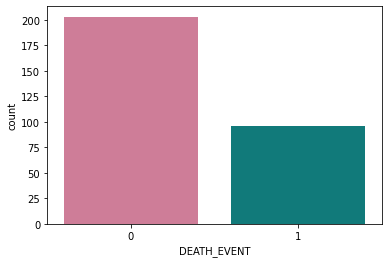

In [17]:
sns.countplot(Y , palette= ['#DB7093',"#008B8B"])

The Data is Imbalanced

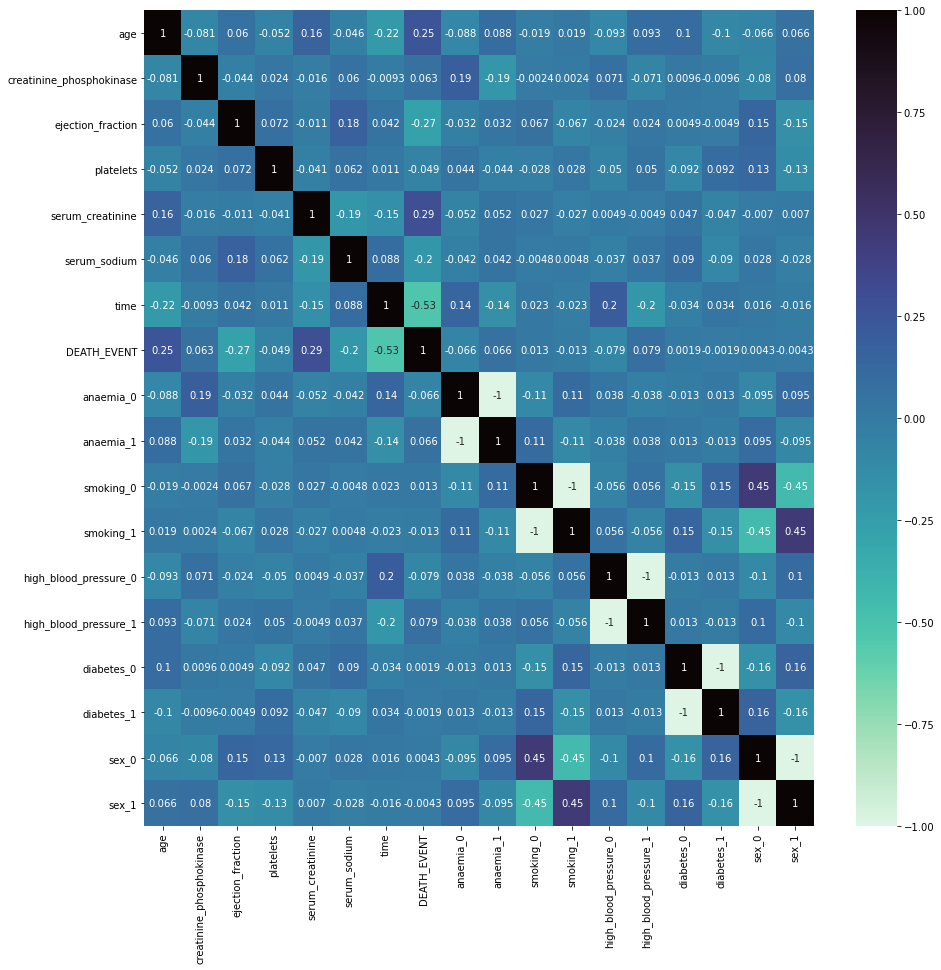

In [18]:
plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot = True, cmap="mako_r")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1CF85F6A0>,
      dtype=object)

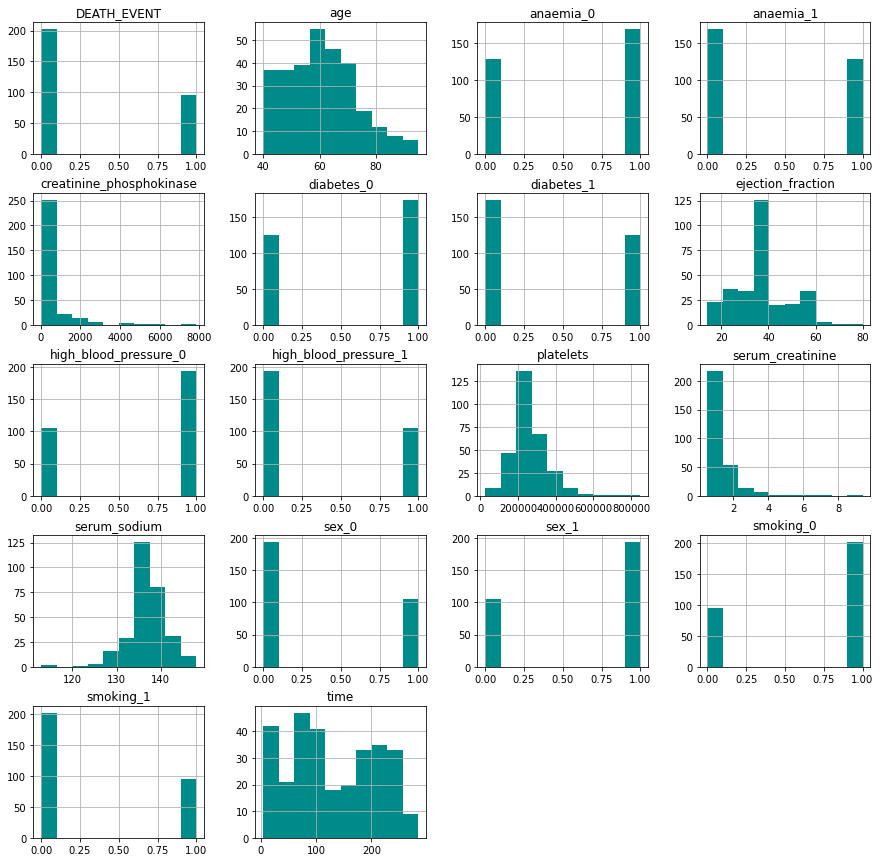

In [19]:
data.hist(figsize = (15,15), color= '#008B8B')

### Split to Train and Test data

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state =0)

In [21]:
x_train.shape

(239, 16)

In [22]:
x_test.shape

(60, 16)

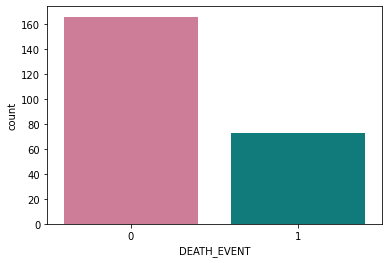

In [23]:
sns.countplot(y_train,  palette= ['#DB7093',"#008B8B"])

Smote the variable to fix the Imbalanced data

In [24]:
# # to balance out both event in death event
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# x_train,y_train = oversample.fit_resample(x_train,y_train) 

# Model Building

Standardize x test and x train - Standardization makes all variables contribute equally.

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Different algorithms are used for the prediction

# 1. Logistic Regression
Logistic regression is used to predict the class of individuals based on one or multiple predictor variables . It is used to model a binary outcome, that is a variable, which can have only two possible values: 0 or 1, yes or no, diseased or non-diseased.

In [26]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

In [27]:
model1 = linear_model.LogisticRegression(random_state = 1)
model1.fit(x_train, y_train)
pred = model1.predict(x_test)
Logistic_reg_score = metrics.accuracy_score(y_test, pred)
print("Training set Accuracy is : ", metrics.accuracy_score(
    y_train, model1.predict(x_train)))
print('Test set Accuracy is : ', metrics.accuracy_score(y_test, pred))

Training set Accuracy is :  0.7782426778242678
Test set Accuracy is :  0.7333333333333333


Text(69.0, 0.5, 'Truth')

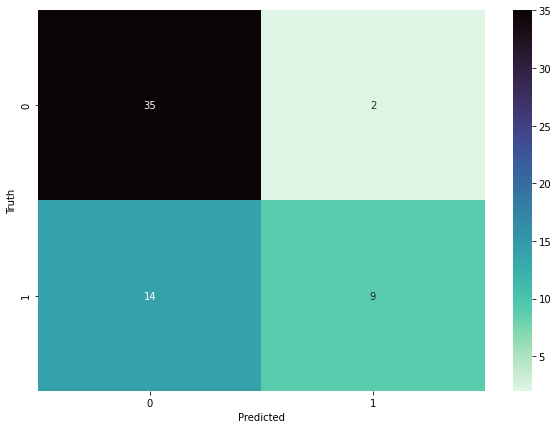

In [28]:
cm1 = tf.math.confusion_matrix(labels = y_test, predictions= pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm1, annot = True, fmt = 'd' , cmap='mako_r') 
plt.xlabel('Predicted')
plt.ylabel('Truth')

# 2. Decision Tree
The Decision tree works with the underlying symptoms and predicts a disease. Initially, we get the user's top five symptoms and put it in an array with the value assigned as 1 across these values. This is passed as an input to the model for predicting the disease.

In [29]:
from sklearn import tree

In [30]:
model2 = tree.DecisionTreeClassifier(random_state=1)
model2.fit(x_train,y_train)
pred = model2.predict(x_test)
Decision_tree_score = metrics.accuracy_score(y_test, pred)
print("Training set Accuracy is :", metrics.accuracy_score
      (y_train, model2.predict(x_train)))
print("Test set Accuracy is :", metrics.accuracy_score(y_test, pred))

Training set Accuracy is : 1.0
Test set Accuracy is : 0.65


Text(69.0, 0.5, 'Truth')

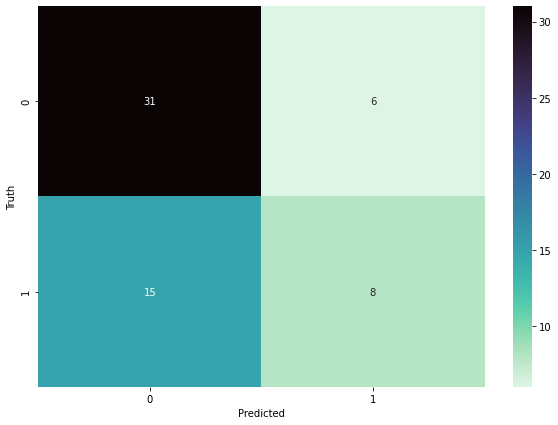

In [31]:
cm2 = tf.math.confusion_matrix(labels = y_test, predictions= pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm2, annot = True, fmt = 'd' , cmap='mako_r') 
plt.xlabel('Predicted')
plt.ylabel('Truth')

# 3. Random Forest
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [32]:
from sklearn import ensemble

In [33]:
model3 = ensemble.RandomForestClassifier(random_state=1)
model3.fit(x_train,y_train)
pred = model3.predict(x_test)
random_forest_score = metrics.accuracy_score(y_test, pred)
print("Training set Accuracy is :", metrics.accuracy_score(y_train, 
                                   model3.predict(x_train)))
print("Test set Accuracy is :", metrics.accuracy_score(y_test, pred))

Training set Accuracy is : 1.0
Test set Accuracy is : 0.7


Text(69.0, 0.5, 'Truth')

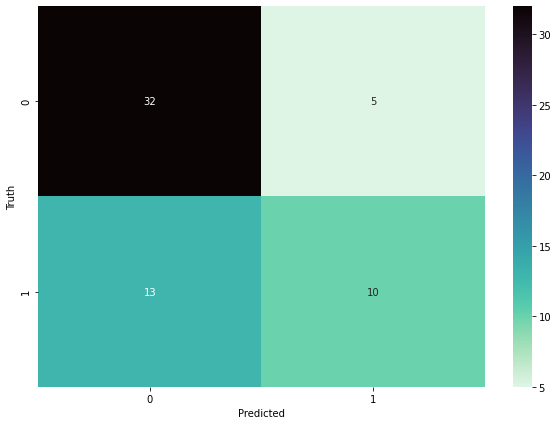

In [34]:
cm3 = tf.math.confusion_matrix(labels = y_test, predictions= pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm3, annot = True, fmt = 'd' , cmap='mako_r') 
plt.xlabel('Predicted')
plt.ylabel('Truth')

# 4. SVM
A support vector machine (SVM) is a type of deep learning algorithm that performs supervised learning for classification or regression of data groups. SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable.

In [35]:
from sklearn import svm

In [36]:
model4 = svm.SVC(random_state = 1)
model4.fit(x_train, y_train)
pred = model4.predict(x_test)
svm_score = metrics.accuracy_score(y_test, pred)
print("Training set accuracy is:", metrics.accuracy_score(y_train,
                            model4.predict(x_train)))
print("Test set accuracy:", metrics.accuracy_score(y_test, pred))

Training set accuracy is: 0.8410041841004184
Test set accuracy: 0.7333333333333333


Text(69.0, 0.5, 'Truth')

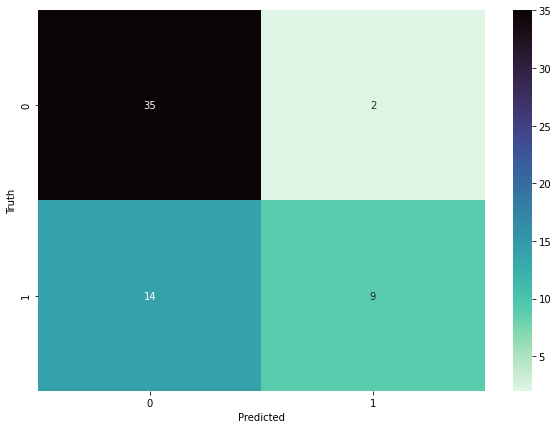

In [37]:
cm4 = tf.math.confusion_matrix(labels = y_test, predictions= pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm4, annot = True, fmt = 'd' , cmap='mako_r') 
plt.xlabel('Predicted')
plt.ylabel('Truth')

# 5. Gradient Boosting
Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error.

In [38]:
model5 = ensemble.GradientBoostingClassifier(random_state=1)
model5.fit(x_train,y_train)
pred = model5.predict(x_test)

gradient_boosting_score = metrics.accuracy_score(y_test, pred)
print("Train set Accuracy is: ", metrics.accuracy_score
      (y_train, model5.predict(x_train)))
print("Test set Accuracy is: ", metrics.accuracy_score(y_test, pred))

Train set Accuracy is:  0.9832635983263598
Test set Accuracy is:  0.7


Text(69.0, 0.5, 'Truth')

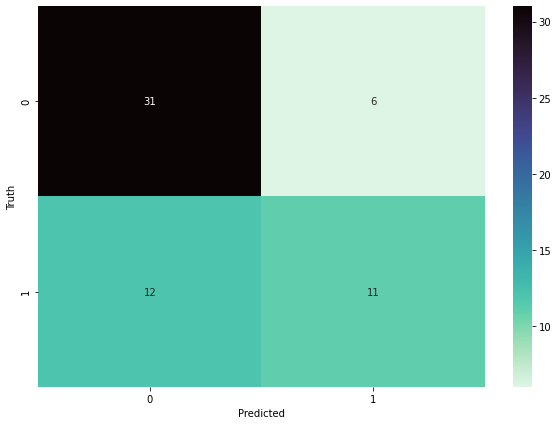

In [39]:
cm5 = tf.math.confusion_matrix(labels = y_test, predictions= pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm5, annot = True, fmt = 'd' , cmap='mako_r') 
plt.xlabel('Predicted')
plt.ylabel('Truth')

# 6. Neural network (SKlearn)
A neural network consists of units (neurons), arranged in layers, which convert an input vector into some output. Each unit takes an input, applies a (often nonlinear) function to it and then passes the output on to the next layer.

In [40]:
from sklearn import neural_network

In [41]:
model6 = neural_network.MLPClassifier(random_state=1)
model6.fit(x_train,y_train)
pred = model6.predict(x_test)
neural_network_score = metrics.accuracy_score(y_test, pred)
print("Train set Accuracy is: ", metrics.accuracy_score
      (y_train, model6.predict(x_train)))
print("Test set Accuracy is: ", metrics.accuracy_score(y_test, pred))

Train set Accuracy is:  0.8786610878661087
Test set Accuracy is:  0.7666666666666667


C:\Users\Jaishika\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(69.0, 0.5, 'Truth')

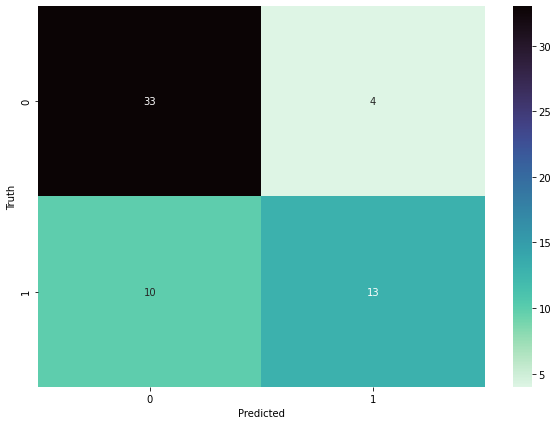

In [42]:
cm6 = tf.math.confusion_matrix(labels = y_test, predictions= pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm6, annot = True, fmt = 'd' , cmap='mako_r') 
plt.xlabel('Predicted')
plt.ylabel('Truth')

# 7. Naive Bayes
It is a classification technique based on Bayes' theorem with an assumption of independence between predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. 

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
model7 = GaussianNB()
model7.fit(x_train,y_train)
pred = model7.predict(x_test)
naive_bayes_score = metrics.accuracy_score(y_test, pred)

print("Train set Accuracy is: ", metrics.accuracy_score
      (y_train, model7.predict(x_train)))
print("Test set Accuracy is: ", metrics.accuracy_score(y_test, pred))

Train set Accuracy is:  0.7364016736401674
Test set Accuracy is:  0.65


Text(69.0, 0.5, 'Truth')

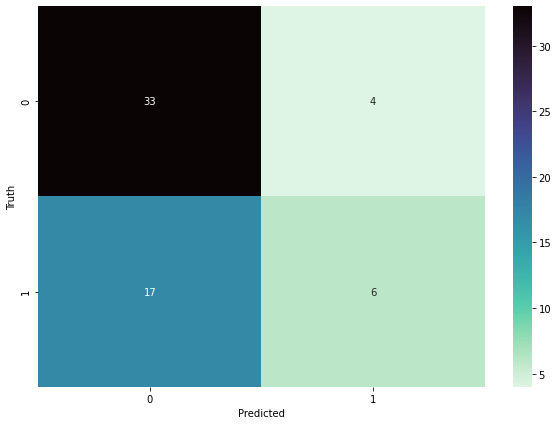

In [45]:
cm7 = tf.math.confusion_matrix(labels = y_test, predictions= pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm7, annot = True, fmt = 'd' , cmap='mako_r') 
plt.xlabel('Predicted')
plt.ylabel('Truth')

# 8. Artificial Neural Network (ANN)
An artificial neuron network (neural network) is a computational model that mimics the way nerve cells work in the human brain. Artificial neural networks (ANNs) use learning algorithms that can independently make adjustments - or learn, in a sense - as they receive new input.

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [47]:
x_train.shape

(239, 16)

In [48]:
ann_model = Sequential()
ann_model.add(Dense(16,input_dim = 16, activation = 'relu')) 
ann_model.add(Dropout(0.2))                                # To reduce Overfitting Dropout is used
ann_model.add(Dense(8, activation='relu'))
ann_model.add(Dropout(0.25))
ann_model.add(Dense(4, activation='relu'))
ann_model.add(Dropout(0.25))
# ann_model.add(Dense(2, activation='relu'))
# ann_model.add(Dropout(0.01))
ann_model.add(Dense(1,activation ='sigmoid'))
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dropout_2 (Dropout)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5

In [49]:
ann_model.compile(loss="binary_crossentropy", 
              optimizer='adam', metrics=['accuracy'])

In [50]:
history = ann_model.fit(x_train, y_train, batch_size = 2, epochs = 50, validation_data= (x_test,y_test))

Epoch 1/50
120/120 [==============================] - 1s 4ms/step - loss: 0.7398 - accuracy: 0.5690 - val_loss: 0.6939 - val_accuracy: 0.6000
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5983 - val_loss: 0.6946 - val_accuracy: 0.6167
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.6192 - val_loss: 0.6888 - val_accuracy: 0.6167
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6083 - accuracy: 0.6946 - val_loss: 0.6948 - val_accuracy: 0.6167
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6569 - val_loss: 0.6837 - val_accuracy: 0.6167
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.6065 - accuracy: 0.6862 - val_loss: 0.6737 - val_accuracy: 0.6167
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.6987 - val_loss: 0.6637 - val_accuracy: 0.6167
Epoch 

In [51]:
ann_model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 0s/step - loss: 0.5991 - accuracy: 0.7333


[0.5991359949111938, 0.7333333492279053]

2/2 [==============================] - 0s 4ms/step


Text(69.0, 0.5, 'Truth')

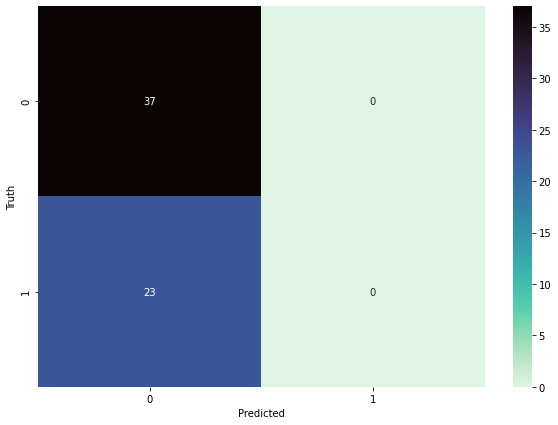

In [52]:
ann_score = metrics.accuracy_score(y_test, pred)
pred = ann_model.predict(x_test)
cm = tf.math.confusion_matrix(labels = y_test, predictions= pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd' , cmap='mako_r') 
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Comparative Analysis

Prediction results on Test data using different algorithms
1. Logistic Regression - 0.73
2. Decision Tree - 0.65
3. Random Forest - 0.7
4. SVM - 0.73
5. Gradient Boosting - 0.7
6. Neural Network (SKlearn) - 0.76
7. Naive Bayes - 0.65
8. Artificial Neural Network - 0.96

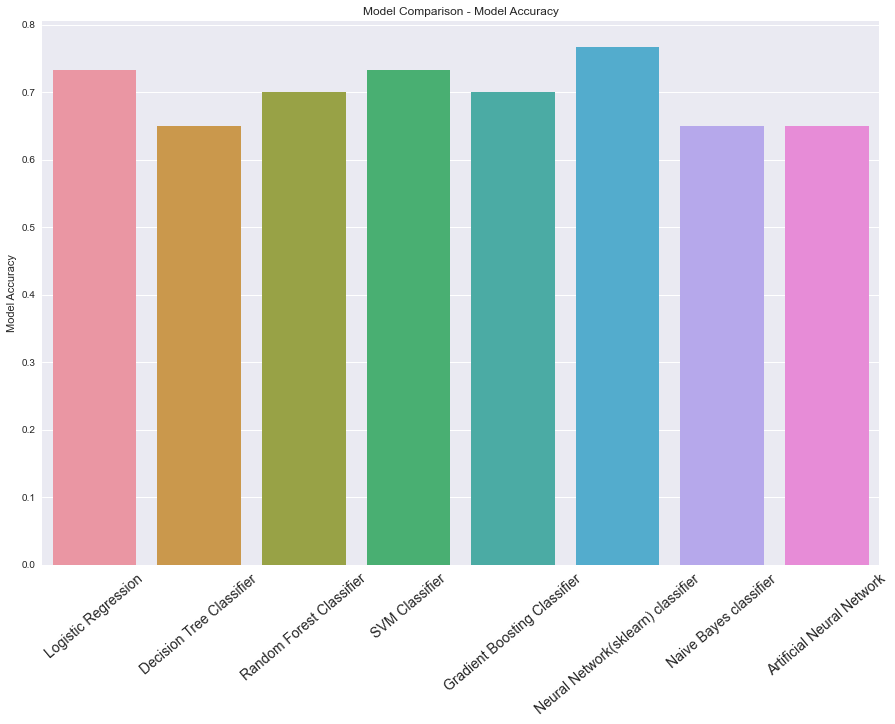

In [53]:
plt.style.use("seaborn")

x = ["Logistic Regression",
     "Decision Tree Classifier",
     "Random Forest Classifier",
     "SVM Classifier",  
     "Gradient Boosting Classifier",
     "Neural Network(sklearn) classifier",
     "Naive Bayes classifier",
     "Artificial Neural Network"]

y = [Logistic_reg_score,
     Decision_tree_score,
     random_forest_score,
     svm_score,  
     gradient_boosting_score,
     neural_network_score,
     naive_bayes_score,
     ann_score]

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=x,y=y);
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40, fontsize=14)
plt.title("Model Comparison - Model Accuracy")
plt.show()

# Neural Network (Sklearn) classifier and  performs best for the Heart Failure prediction